In [1]:
experiment_name = '_exp3'
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run init.py

Setting up variables & DB connection for experiment:

*******************
25similar
*******************

Snorkel session connected to:  postgres:///snorkel25similar


/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
# Rebuild text
from sklearn_bridge import recreate_text_representation, candidate_dict_to_df
import sklearn, pickle, time, seaborn
import pandas as pd
from itertools import product

In [3]:
from MLutils import report_to_df, train_evaluate, diversity_heatmap

In [4]:
import pickle
with open(path_candidate_dict_pkl, 'rb') as f:
    candidate_dict = pickle.load(f)

ids = dict()
for splt in candidate_dict.keys():
    print "Split = %i : imported %i candidates" %(splt, len(candidate_dict[splt].keys()))
    ids[splt] = set(candidate_dict[splt].keys()) # import candidate ids too

Split = 0 : imported 13007 candidates
Split = 1 : imported 3242 candidates
Split = 2 : imported 8221 candidates
Split = 3 : imported 130424 candidates


** Load cands (as cand objects for LSTM) ** 

In [45]:
train_cands = session.query(REGULATOR).filter(REGULATOR.split == 0).order_by(REGULATOR.id).all()
dev_cands = session.query(REGULATOR).filter(REGULATOR.split == 1).order_by(REGULATOR.id).all()
test_cands = session.query(REGULATOR).filter(REGULATOR.split == 2).order_by(REGULATOR.id).all()
unlab_cands = session.query(REGULATOR).filter(REGULATOR.split == 3).order_by(REGULATOR.id).all()

print('Training set:\t{0} candidates'.format(len(train_cands)))
print('Val set:\t{0} candidates'.format(len(dev_cands)))
print('Test set:\t{0} candidates'.format(len(test_cands)))
print('Unlab set:\t{0} candidates'.format(len(unlab_cands)))

Training set:	13007 candidates
Dev set:	3242 candidates
Test set:	8221 candidates
Unlab set:	23509 candidates


** Load cands (as ML feature matrix) ** 

In [ ]:
## TODO: reduce dict -> delete keys not in db to keep consistency

In [69]:
def keep_cands(df,ids_to_keep):
    """Keep only specific ids out of a dataframe (based on index)"""
    ids_to_drop = set(df.index) - set(ids_to_keep)
    return df.drop(ids_to_drop)

In [73]:
ids[2]

{32768,
 32770,
 32772,
 32774,
 32776,
 32777,
 32780,
 32781,
 32782,
 32785,
 32787,
 32789,
 32790,
 32792,
 32793,
 32795,
 32796,
 32798,
 32799,
 32800,
 32802,
 32804,
 32806,
 32808,
 32809,
 32810,
 32811,
 32813,
 32814,
 32815,
 32816,
 32817,
 32818,
 32819,
 32821,
 32822,
 32825,
 32826,
 32827,
 32829,
 32831,
 32832,
 32833,
 32834,
 32837,
 32838,
 32840,
 32842,
 32843,
 32846,
 32849,
 32850,
 32853,
 32855,
 32856,
 32857,
 32860,
 32861,
 32862,
 32863,
 32866,
 32867,
 32868,
 32869,
 32872,
 32873,
 32874,
 32875,
 32878,
 32879,
 32880,
 32881,
 32884,
 32885,
 32886,
 32887,
 32890,
 32891,
 32892,
 32895,
 32896,
 32897,
 32898,
 32899,
 32901,
 32902,
 32903,
 32904,
 32905,
 32907,
 32908,
 32909,
 32910,
 32911,
 32913,
 32914,
 32915,
 32916,
 32917,
 32920,
 32921,
 32922,
 32923,
 32925,
 32927,
 32928,
 32929,
 32932,
 32933,
 32935,
 32936,
 32938,
 32939,
 32940,
 32944,
 32946,
 32947,
 32951,
 32952,
 32953,
 32954,
 32956,
 32957,
 32958,
 32959,


In [74]:
ids[3]

{40200,
 40201,
 40202,
 40203,
 40204,
 40205,
 40206,
 40207,
 40208,
 40209,
 40210,
 40211,
 40212,
 40213,
 40214,
 40215,
 40216,
 40217,
 40218,
 40219,
 40220,
 40221,
 40222,
 40223,
 40224,
 40225,
 40226,
 40227,
 40228,
 40229,
 40230,
 40231,
 40232,
 40233,
 40234,
 40235,
 40236,
 40237,
 40238,
 40239,
 40240,
 40241,
 40242,
 40243,
 40244,
 40245,
 40246,
 40247,
 40248,
 40249,
 40250,
 40251,
 40252,
 40253,
 40254,
 40255,
 40256,
 40257,
 40258,
 40259,
 40260,
 40261,
 40262,
 40263,
 40264,
 40265,
 40266,
 40267,
 40268,
 40269,
 40270,
 40271,
 40272,
 40273,
 40274,
 40275,
 40276,
 40277,
 40278,
 40279,
 40280,
 40281,
 40282,
 40283,
 40284,
 40285,
 40286,
 40287,
 40288,
 40289,
 40290,
 40291,
 40292,
 40293,
 40294,
 40295,
 40296,
 40297,
 40298,
 40299,
 40300,
 40301,
 40302,
 40303,
 40304,
 40305,
 40306,
 40307,
 40308,
 40309,
 40310,
 40311,
 40312,
 40313,
 40314,
 40315,
 40316,
 40317,
 40318,
 40319,
 40320,
 40321,
 40322,
 40323,
 40324,


In [77]:
df_test

,text,label,doc_id,sent_id
26265,high - affinity blockade of ENTITY2 by ENTITY1...,1,18574460,432353
26266,and GENE each increase fluorescent ENTITY1 ( C...,-1,23274898,437413
26268,"stimulation , CHEMICAL , and ENTITY2 each incr...",-1,23274898,437413
26269,CHEMICAL uptake be inhibit by ENTITY1 GENE and...,-1,23274898,437413
26271,"stimulation , CHEMICAL , and ENTITY2 each incr...",-1,23274898,437413
26272,fluorescent CHEMICAL CHEMICAL CHEMICAL ( ENTIT...,-1,23274898,437413
26274,"stimulation , CHEMICAL , and ENTITY2 each incr...",-1,23274898,437413
26275,stimulation and CHEMICAL - dependent ENTITY1 u...,-1,23274898,437413
26279,"stimulation , CHEMICAL , and ENTITY2 each incr...",-1,23274898,437413
26281,ENTITY1 ( a specific inhibitor of GENE GENE ) ...,1,22422627,476950


In [75]:
# Decide on text representation
trim_text = True
trim_window = 5
use_lemmas = True

df_train = candidate_dict_to_df(candidate_dict[0],trim_text=trim_text, window=trim_window, lemmas = use_lemmas ).sort_index()
df_val = candidate_dict_to_df(candidate_dict[1],trim_text=trim_text, window=trim_window, lemmas = use_lemmas ).sort_index()
df_test = candidate_dict_to_df(candidate_dict[2],trim_text=trim_text, window=trim_window, lemmas = use_lemmas ).sort_index()
df_unlab = candidate_dict_to_df(candidate_dict[3],trim_text=trim_text, window=trim_window, lemmas = use_lemmas ).sort_index()

# Drop cands not in database already
df_train1 = keep_cands(df_train,ids[0])
df_val1 = keep_cands(df_val,ids[1])
df_test1 = keep_cands(df_val,ids[2])
df_unlab1 = keep_cands(df_val,ids[3])

print('Training set:\t{0} candidates'.format(len(df_train1)))
print('Val set:\t{0} candidates'.format(len(df_val1)))
print('Test set:\t{0} candidates'.format(len(df_test1)))
print('Unlab set:\t{0} candidates'.format(len(df_unlab1)))

Training set:	13007 candidates
Val set:	3242 candidates
Test set:	0 candidates
Unlab set:	0 candidates


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


In [11]:
text_vectorizer = TfidfVectorizer(ngram_range=[0,3])

In [12]:
X_train = text_vectorizer.fit_transform(df_train.text)
y_train = df_train.label

X_val = text_vectorizer.transform(df_val.text)
y_val = df_val.label

X_test = text_vectorizer.transform(df_test.text)
y_test = df_test.label

# X_unlab = text_vectorizer.transform(df_unlab_sim.text)
# # X_unlab = svd.transform(X_unlab)



In [13]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils import shuffle

In [14]:
X_train,y_train = shuffle(X_train,y_train, random_state=0)

# Learning curves

## Write learning_curve function

In [15]:
##     TODO:  first undersample

In [16]:
from MLutils import balance_candidates

In [18]:
from MLutils import neg_to_bin_labels, custom_learning_curve, plot_learning_curve

In [19]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from snorkel.learning import reRNN

/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [20]:
from imblearn.under_sampling import  RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train,y_train = rus.fit_sample(X_train,y_train)

In [21]:
from scipy.sparse import csr_matrix,vstack
import numpy as np
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.utils import shuffle
from copy import deepcopy

** Given X_train, y_train (full training set to perform incremental splits)
and optionally X_init, y_init (to start the initial validation curve from that point onwards) **

In [22]:
### define function inputs  ###

clf = LogisticRegression()
cv_splits = 3 # for cross-validating and finding variance in VALIDATION set
# X_init: the training dataset on beginning of the learning curve (spot 0)
# X_increm: the additional examples for plotting incremental learning curves

## construct dummy dataset
splt_sizes = np.array([ 0.1, 0.33, 0.55, 0.78, 1.])

X_init, y_init = rus.fit_sample(X_train, y_train)
X_increm, y_increm = rus.fit_sample(X_test, y_test)

print 'X_init', X_init.shape, len(y_init)
print 'X_increm', X_increm.shape, len(y_increm)


X_init (6576, 77657) 6576
X_increm (3968, 77657) 3968


In [30]:
clf = LogisticRegression()

F1 of train set 0.0
preds: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predict

F1 of train set 0.9427842018321068
preds: [0 1 1 ... 1 1 0]


<module 'matplotlib.pyplot' from '/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

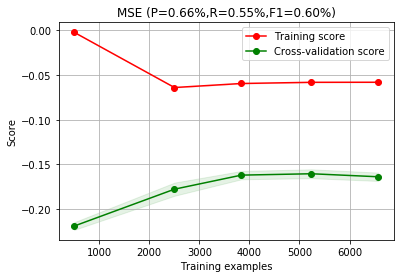

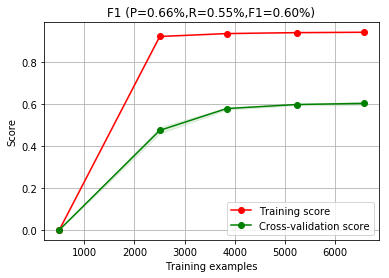

In [31]:
# with ML model

from MLutils import custom_learning_curve

train_sizes, train_mse, train_f1, valid_mse , valid_f1 , test_prf1 = custom_learning_curve(
    clf, X_train[500:],y_train[500:], X_val, y_val, X_init= X_train[:500], y_init=y_train[:500],
                      X_test = X_test, y_test = y_test
                     )

plot_learning_curve(train_mse,valid_mse,train_sizes, 'MSE (P=%.2f%%,R=%.2f%%,F1=%.2f%%)'%(test_prf1))

plot_learning_curve(train_f1,valid_f1,train_sizes, title='F1 (P=%.2f%%,R=%.2f%%,F1=%.2f%%)'%(test_prf1))


In [32]:
test_prf1

(0.6646452395391146, 0.5524193548387096, 0.6033581062482796)

** Fix snorkel RNN **

In [203]:
from sklearn.model_selection import learning_curve

In [ ]:
clf = reRNN(seed=1701, deterministic=True)

In [ ]:
# get train, val, test, ids
# query db for candidates (ordered by etc....)
# feed also labels.


In [ ]:
# with ML model

from MLutils import custom_learning_curve

train_sizes, train_mse, train_f1, valid_mse , valid_f1 , test_prf1 = custom_learning_curve(
    clf, X_train[500:],y_train[500:], X_val, y_val, X_init= X_train[:500], y_init=y_train[:500],
                      X_test = X_test, y_test = y_test
                     )

plot_learning_curve(train_mse,valid_mse,train_sizes, 'MSE (P=%.2f%%,R=%.2f%%,F1=%.2f%%)'%(test_prf1))

plot_learning_curve(train_f1,valid_f1,train_sizes, title='F1 (P=%.2f%%,R=%.2f%%,F1=%.2f%%)'%(test_prf1))


In [209]:
X_train, y_train = shuffle(X_train,y_train)

In [220]:
train_sizes_abs, train_scores, test_scores = learning_curve(
    LogisticRegression(),
    X_train, y_train, 
    scoring = mse_scorer
)


In [221]:
train_sizes_abs

array([ 438, 1424, 2411, 3397, 4384])

In [222]:
train_scores

array([[-0.02739726, -0.0913242 , -0.0913242 ],
       [-0.11516854, -0.11235955, -0.11235955],
       [-0.17917876, -0.13936126, -0.15429282],
       [-0.22019429, -0.19546659, -0.184869  ],
       [-0.23722628, -0.21441606, -0.19616788]])

In [226]:
np.mean(train_scores, axis=1)

array([-0.07001522, -0.11329588, -0.15761095, -0.20017663, -0.21593674])

<module 'matplotlib.pyplot' from '/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

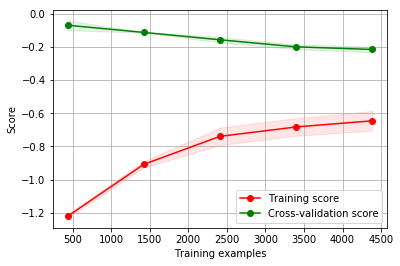

In [227]:
plot_learning_curve(test_scores, train_scores, train_sizes_abs)

In [190]:
train_sizes

[1000, 2840, 4066, 5349, 6576]

In [185]:
train_mse

array([[-0.1093275 ],
       [-0.09710326],
       [-0.09047901],
       [-0.08456929],
       [-0.08273065]])

In [162]:
train_f1

array([[ 0.71879887],
       [ 0.81435143],
       [ 0.8458771 ],
       [ 0.86775214],
       [ 0.87786869]])

In [163]:
valid_mse

array([[-0.16188714, -0.17113784, -0.17592593],
       [-0.15726179, -0.160037  , -0.15833333],
       [-0.15448659, -0.15633673, -0.15462963],
       [-0.15078631, -0.15911193, -0.14537037],
       [-0.14616096, -0.15356152, -0.15092593]])

In [164]:
valid_f1

array([[ 0.48377581,  0.43425076,  0.39102564],
       [ 0.55026455,  0.53116531,  0.51558074],
       [ 0.56847545,  0.56777494,  0.54495913],
       [ 0.5914787 ,  0.5678392 ,  0.57908847],
       [ 0.6127451 ,  0.58706468,  0.56992084]])

In [165]:
test_prf1

(array([ 0.91092512,  0.90718954]),
 array([ 0.97723264,  0.69959677]),
 array([ 0.9429146 ,  0.78998293]))

In [166]:
from MLutils import plot_learning_curve

In [169]:
test_prf1

(array([ 0.91092512,  0.90718954]),
 array([ 0.97723264,  0.69959677]),
 array([ 0.9429146 ,  0.78998293]))

In [63]:
clf.__class__

sklearn.linear_model.logistic.LogisticRegression

In [110]:
a = np.array(mse_train).reshape((-1,1))

In [104]:
valid_mse

array([[-0.74745606, -0.71415356, -0.75925926],
       [-0.74745606, -0.71415356, -0.75925926],
       [-0.74745606, -0.71415356, -0.75925926],
       [-0.74745606, -0.71415356, -0.75925926],
       [-0.74745606, -0.71415356, -0.75925926]])

In [107]:
clf_name = str(clf.__class__).split('.')[-1].split("'")[0]

In [118]:
print p,r,f1

[ 0.80242567  0.84810127] [ 0.98653199  0.23639113] [ 0.88500539  0.36972803]


## Plot learning curves

In [66]:
from learning_curves import learning_curve

In [33]:
from scipy.sparse import vstack
import numpy as np

In [34]:
X_all = vstack((X_train,X_val))
y_all = (y_train.append(y_val)).values
X_all_split = np.array([0 for i in enumerate(X_train)] + [1 for i in enumerate(X_val)])

In [256]:
X_train

<6576x77657 sparse matrix of type '<type 'numpy.float64'>'
	with 317640 stored elements in Compressed Sparse Row format>

In [36]:
X_all_split.shape

(16249,)

In [65]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
f1_scorer = make_scorer(f1_score, greater_is_better=True)


In [66]:
train_sizes, train_scores, valid_scores = learning_curve(
    AdaBoostClassifier(n_estimators=75),
    X_all, y_all, 
    #train_sizes=range(1000, X_train.shape[0], 1000), 
    groups = X_all_split,
    scoring = mse_scorer
)


In [67]:
train_scores

array([[-0.41366574, -0.33979686, -0.33979686],
       [-0.59772727, -0.56931818, -0.56931818],
       [-0.63521907, -0.62581836, -0.63857646],
       [-0.64665237, -0.6285442 , -0.63092685],
       [-0.63995569, -0.64069424, -0.64401773]])

In [68]:
valid_scores

array([[-0.8669005 , -0.86616208, -0.90858726],
       [-0.76056858, -0.79527414, -0.80590951],
       [-0.6741739 , -0.76352224, -0.76306556],
       [-0.73620085, -0.73103194, -0.74607572],
       [-0.71847886, -0.73472402, -0.69953832]])

In [69]:
train_sizes

array([ 1083,  3520,  5957,  8394, 10832])

In [95]:
from MLutils import plot_learning_curve

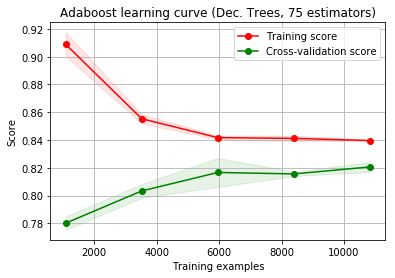

In [61]:
plot_learning_curve(train_scores, 
                        valid_scores,
                        train_sizes=train_sizes,
                   title = 'Adaboost learning curve (Dec. Trees, 75 estimators)')

plt.show()

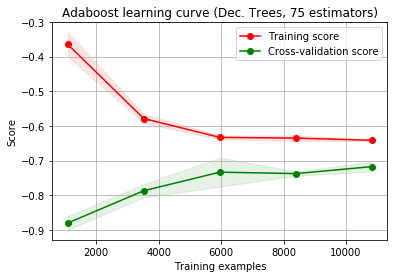

In [70]:
plot_learning_curve(train_scores, 
                        valid_scores,
                        train_sizes=train_sizes,
                   title = 'Adaboost learning curve (Dec. Trees, 75 estimators)')

plt.show()

In [71]:
## F1 score

In [72]:
train_sizes, train_scores, valid_scores = learning_curve(
    AdaBoostClassifier(n_estimators=75 ),
    X_all, y_all, 
    #train_sizes=range(1000, X_train.shape[0], 1000), 
    groups = X_all_split,
    scoring = f1_scorer
)


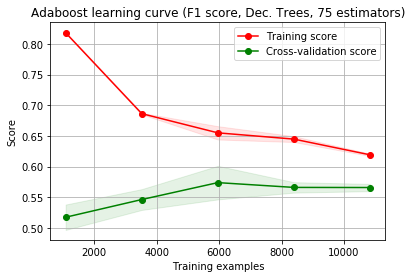

In [74]:
plot_learning_curve(train_scores, 
                        valid_scores,
                        train_sizes=train_sizes,
                   title = 'Adaboost learning curve (F1 score, Dec. Trees, 75 estimators)')

plt.show()

** With Linear SVC **

In [88]:
from sklearn.svm import SVC

In [75]:
# estimators = range(50,351,150)
estimators = [1,5,25] #+range(50,351,25)

scores_df = pd.DataFrame(index=estimators)



for n in estimators:
    clf = AdaBoostClassifier(n_estimators=n, 
                             base_estimator = LinearSVC,
                             algorithm='SAMME'
                            )
    clf.fit(X_train,y_train)
    
    pred = clf.predict(X_train)
    scores_df.loc[n,'f1_train'] = f1_score(y_train,pred)
    pred = clf.predict(X_val)
    scores_df.loc[n,'f1_val'] = f1_score(y_val,pred)
#     scores_df['train_score'] = clf.score(X_train,y_train)



# scores = validation_curve(clf, X_train, y_train,
#                          'n_estimators', estimators)


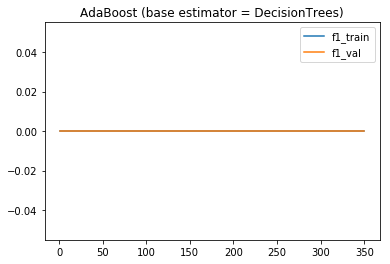

In [83]:
scores_df.plot(title='AdaBoost (base estimator = LR)')

## BrownBoost

In [79]:
from MLutils import BrownBoost

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
# prediction = brownboost.predict(X_test)
# accuracy = accuracy_score(y_test, prediction)
# precision = precision_score(y_test, prediction, pos_label=1, labels=[-1, 1])
# recall = recall_score(y_test, prediction, pos_label=1, labels=[-1, 1])
# clf_f1_score = f1_score(y_test, prediction, pos_label=1, labels=[-1, 1])
# print("mean accuracy : %.4f \n" % accuracy)
# precision, recall, clf_f1_score

In [110]:
base_estimator = DecisionTreeClassifier(max_depth=1)
brownboost = BrownBoost(base_estimator, c=1)
st_time = time.time()

brownboost.fit(X_train, np.array(y_train))
pred = brownboost.predict(X_train)
f1_train = f1_score(y_train,pred)
pred = brownboost.predict(X_val)
f1_val = f1_score(y_val,pred)
print f1_train,f1_val
print time.time()-st_time

0.724848915748 0.573268921095
808.138631821


In [76]:
## BrownBoost learning curves

In [77]:
import time

In [93]:
from MLutils import BrownBoost

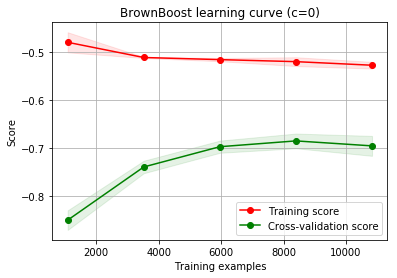

5793.73460007


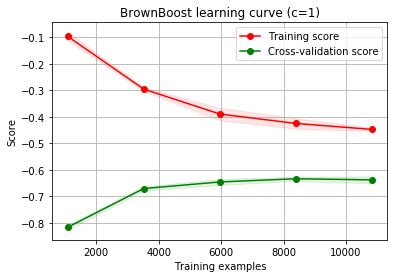

8870.76387811


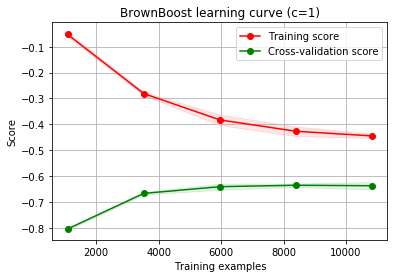

8856.51826715


In [113]:
#define BrownBoost hyperparams

for c in [.5,1,1.5]:

    base_estimator = DecisionTreeClassifier(max_depth=1)

    st_time = time.time()
    train_sizes, train_scores, valid_scores = learning_curve(
        BrownBoost(base_estimator, c=c) ,
        X_all, y_all, 
        #train_sizes=range(1000, X_train.shape[0], 1000), 
        groups = X_all_split,
        scoring = mse_scorer,
        n_jobs = -1

    )

    plot_learning_curve(train_scores, 
                            valid_scores,
                            train_sizes=train_sizes,
                       title = 'BrownBoost learning curve (c=%.2f)'%c)

    plt.show()
    print time.time()-st_time

## RobustBoost

In [113]:
from MLutils import RobustBoost

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
base_estimator = DecisionTreeClassifier(max_depth=1)
robustboost = RobustBoost(base_estimator)

In [118]:
# prediction = brownboost.predict(X_test)
# accuracy = accuracy_score(y_test, prediction)
# precision = precision_score(y_test, prediction, pos_label=1, labels=[-1, 1])
# recall = recall_score(y_test, prediction, pos_label=1, labels=[-1, 1])
# clf_f1_score = f1_score(y_test, prediction, pos_label=1, labels=[-1, 1])
# print("mean accuracy : %.4f \n" % accuracy)
# precision, recall, clf_f1_score

In [119]:
# robustboost.fit(X_train, np.array(y_train))
# pred = robustboost.predict(X_train)
# f1_train = f1_score(y_train,pred)
# pred = robustboost.predict(X_val)
# f1_val = f1_score(y_val,pred)
# print f1_train,f1_val

NameError: global name 't' is not defined